# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [135]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")
penguins_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [136]:
missing_values = penguins_df[penguins_df.isnull().any(axis=1)]
print (missing_values)

     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex
3                 NaN              NaN                NaN          NaN  NaN
8                34.1             18.1              193.0       3475.0  NaN
10               37.8             17.1              186.0       3300.0  NaN
11               37.8             17.3              180.0       3700.0  NaN
47               37.5             18.9              179.0       2975.0  NaN
246              44.5             14.3              216.0       4100.0  NaN
286              46.2             14.4              214.0       4650.0  NaN
324              47.3             13.8              216.0       4725.0  NaN
339               NaN              NaN                NaN          NaN  NaN


In [137]:
clean_penguins_df = penguins_df[~penguins_df.isnull().any(axis=1)]
clean_penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

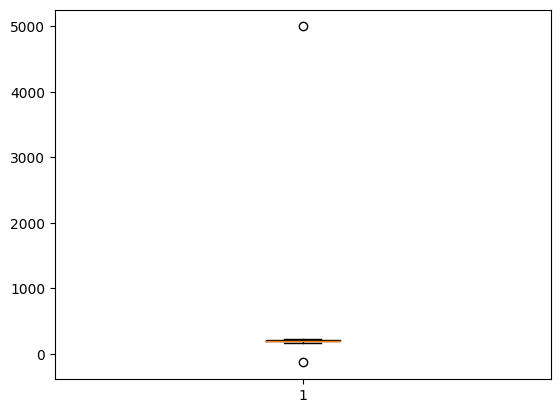

In [138]:
plt.boxplot(x=clean_penguins_df['flipper_length_mm'])
plt.show()

In [139]:
import numpy as np
from scipy.stats import iqr

# Calculate the Interquartile Range (IQR)
iqr_value = iqr(clean_penguins_df['flipper_length_mm'])

# Calculate upper and lower thresholds for outliers
upper_threshold = np.quantile(clean_penguins_df['flipper_length_mm'], 0.75) + (iqr_value * 1.5)
lower_threshold = np.quantile(clean_penguins_df['flipper_length_mm'], 0.25) - (iqr_value * 1.5)

# Filter outliers based on thresholds
outliers = clean_penguins_df[(clean_penguins_df['flipper_length_mm'] > upper_threshold) | (clean_penguins_df['flipper_length_mm'] < lower_threshold)]
outliers

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
9,42.0,20.2,5000.0,4250.0,MALE
14,34.6,21.1,-132.0,4400.0,MALE


In [140]:
penguins_clean = penguins_df.dropna()
penguins_clean[penguins_clean['flipper_length_mm']>4000]
penguins_clean[penguins_clean['flipper_length_mm']<0]
penguins_clean = penguins_clean.drop([9,14])
penguins_clean

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


Dummy Variables

In [141]:
penguins_dummies=pd.get_dummies(penguins_clean["sex"], drop_first=True)
penguins = pd.concat([penguins_clean, penguins_dummies], axis= 1)
#remove the original genre column
penguins = penguins.drop("sex", axis =1)
penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0
340,46.8,14.3,215.0,4850.0,1,0
341,50.4,15.7,222.0,5750.0,0,1
342,45.2,14.8,212.0,5200.0,1,0


Scale Data

In [142]:
scaler= StandardScaler()
penguins_preprocessed = pd.DataFrame(scaler.fit_transform(penguins), columns=penguins.columns)
penguins_preprocessed

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
...,...,...,...,...,...,...
328,0.584511,-1.763116,0.925454,0.890339,1.009050,-1.003008
329,0.510929,-1.456367,0.996775,0.797145,1.009050,-1.003008
330,1.173166,-0.740619,1.496019,1.915480,-0.991031,0.997001
331,0.216602,-1.200743,0.782813,1.232053,1.009050,-1.003008


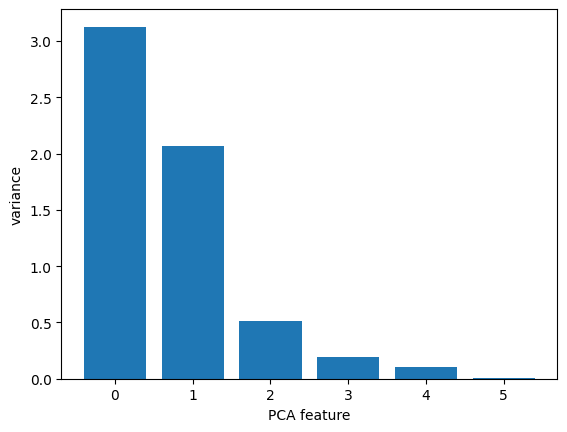

In [143]:
pca =PCA()
pca.fit(penguins_preprocessed)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()
n_components = 2

In [144]:
pca = PCA(n_components= n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

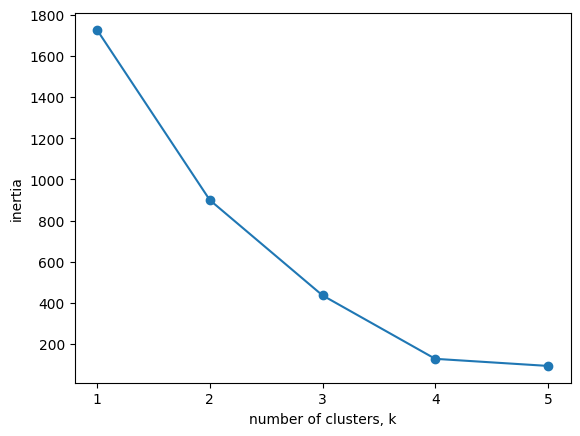

In [145]:
inertias = []
for k in range(1, 6):
    model= KMeans(n_clusters=k, random_state=42)    
    model.fit(penguins_PCA)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
n_clusters=4

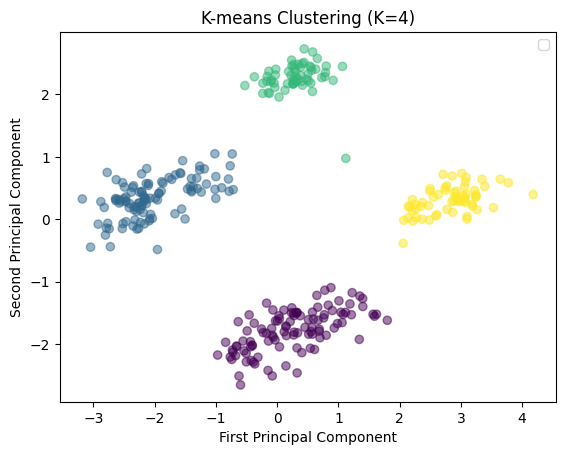

In [146]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
import matplotlib.pyplot as plt
xs = penguins_PCA[:,0]	#point is (x,y) so here we only take the column to be on x’s
ys = penguins_PCA[:,1]
plt.scatter(xs, ys, c=kmeans.labels_, alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

In [147]:
penguins_clean['label'] = kmeans.labels_

In [148]:
stat_penguins = penguins_clean.groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,40.217757,17.611215,189.046729,3419.158879
2,45.545763,14.262712,212.779661,4683.050847
3,49.473770,15.718033,221.540984,5484.836066
